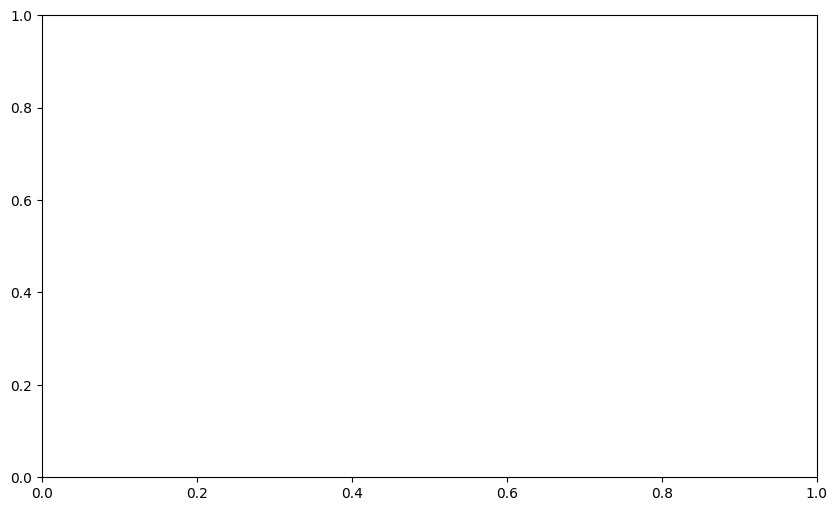

In [1]:
import polars as pl
import matplotlib.pyplot as plt

df = pl.read_csv("data/1.csv", dtypes={"TotalCharges": pl.String}).with_columns(
    pl.col("TotalCharges").str.replace(pattern=" ", value="0").alias("TotalCharges")
)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
churn_response = (
    df.select(pl.col("Churn")).to_series().value_counts(sort=True, parallel=True)
).plot.bar(x="Churn", y="count")